In [966]:
import pandas as pd #Importing required tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [967]:
train=pd.read_excel("/content/Train.xlsx") #loading the data
test=pd.read_excel("/content/Test.xlsx")

In [968]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [969]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [970]:
print("Shape for train data : ", train.shape)
print("Shape for test data : ", test.shape)  #Checkng total rows and columns for both

Shape for train data :  (10683, 11)
Shape for test data :  (2671, 10)


In [971]:
def concat(train,test):
    df= pd.concat([train,test],ignore_index=True)
    return df
merged_df= concat(train,test)

print(merged_df.shape,len(merged_df))  #Both dataset combined

(13354, 11) 13354


In [972]:
merged_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [973]:
merged_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [974]:
#Information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [975]:
merged_df.describe() #Descriptive statistics

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [976]:
merged_df.describe(include=np.object)

<ipython-input-976-5f3ffde43f58>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  merged_df.describe(include=np.object)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354
unique,12,44,5,6,132,223,1451,374,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,4746,633,5682,5682,3000,288,536,672,7056,10493


Observations
1. We have two dataset for training and testing purpose . Training data set has 10,683 rows and 11 attributs while test data has 2671 rows and 1 attributes.
2. We have only 1 numerical column and all other columns are categorical in natiure.

###Data Cleaning

In [977]:
merged_df.isnull().sum() #checking null values

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [978]:
merged_df[merged_df.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [979]:
merged_df['Route'] = merged_df['Route'].fillna(merged_df['Route'] .mode()[0])
merged_df['Total_Stops'] = merged_df['Total_Stops'].fillna(merged_df['Total_Stops'].mode()[0])
merged_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

Observations
1. In this datset just two nan values found for columns Route and Total_stops.
2. Imputed with mode values of their repective columns.

#Exploratory Data analysis

In [980]:
total_columns_lits=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price']

numerical_columns_list=['Price']

categorical_columns_list=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']

***Univariate Analysis***

9087.064120565385
21264633.36538826
1.8125523782189141


<Axes: xlabel='Price'>

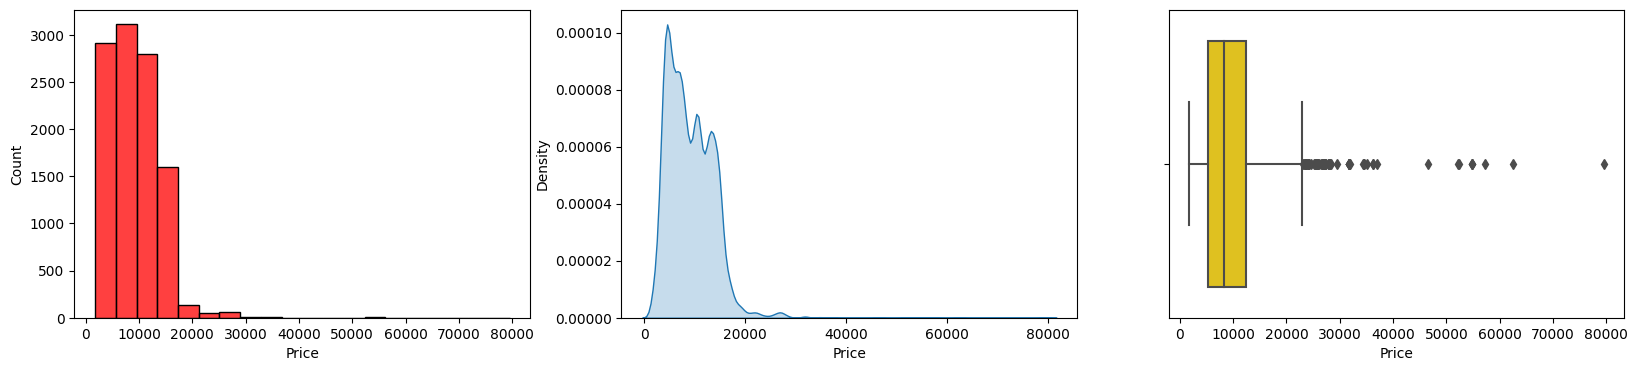

In [981]:
#For column price
print(merged_df.Price.mean())
print(merged_df.Price.var())
print(merged_df.Price.skew())
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.histplot(x=merged_df["Price"],bins=20,color="red")
plt.subplot(1,3,2)
sns.kdeplot(x=merged_df["Price"],fill=True)
plt.subplot(1,3,3)
sns.boxplot(x=merged_df["Price"],color="gold")

Observations
1. Most of Prices distributed b/w 5,000 to 10,000.
2. Right skewed with skewness value 1.81.
3. Column has centered around mean value 9,087 with so many extreme datapoints .

***EXploring column "Each categorical columns"***

In [982]:
#Total unique values for each column
merged_df.apply(lambda x: len(x.unique()))

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1871
dtype: int64

In [983]:
df=merged_df.select_dtypes(exclude=["int","float"]).columns
for i in df:
  print(i,merged_df[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR

In [984]:
merged_df.apply(lambda x: x.unique()) #Unique values

Airline            [IndiGo, Air India, Jet Airways, SpiceJet, Mul...
Date_of_Journey    [24/03/2019, 1/05/2019, 9/06/2019, 12/05/2019,...
Source                   [Banglore, Kolkata, Delhi, Chennai, Mumbai]
Destination        [New Delhi, Banglore, Cochin, Kolkata, Delhi, ...
Route              [BLR → DEL, CCU → IXR → BBI → BLR, DEL → LKO →...
Dep_Time           [22:20, 05:50, 09:25, 18:05, 16:50, 09:00, 18:...
Arrival_Time       [01:10 22 Mar, 13:15, 04:25 10 Jun, 23:30, 21:...
Duration           [2h 50m, 7h 25m, 19h, 5h 25m, 4h 45m, 2h 25m, ...
Total_Stops            [non-stop, 2 stops, 1 stop, 3 stops, 4 stops]
Additional_Info    [No info, In-flight meal not included, No chec...
Price              [3897.0, 7662.0, 13882.0, 6218.0, 13302.0, 387...
dtype: object

###Airline distribution

Jet Airways                          35.539913
IndiGo                               19.200240
Air India                            16.414557
Multiple carriers                    11.554590
SpiceJet                              7.683091
Vistara                               4.552943
Air Asia                              3.032799
GoAir                                 1.797214
Multiple carriers Premium economy     0.119814
Jet Airways Business                  0.059907
Vistara Premium economy               0.037442
Trujet                                0.007488
Name: Airline, dtype: float64


<Axes: >

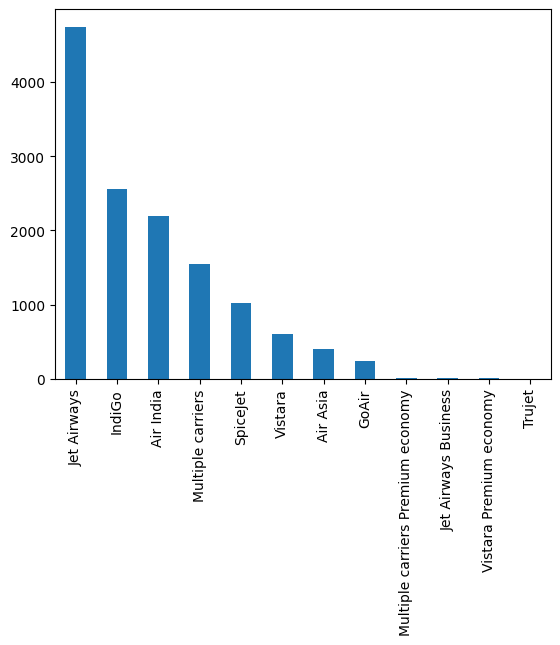

In [985]:
#Airline
print(merged_df["Airline"].value_counts(normalize=True)*100)
merged_df["Airline"].value_counts().plot(kind="bar")

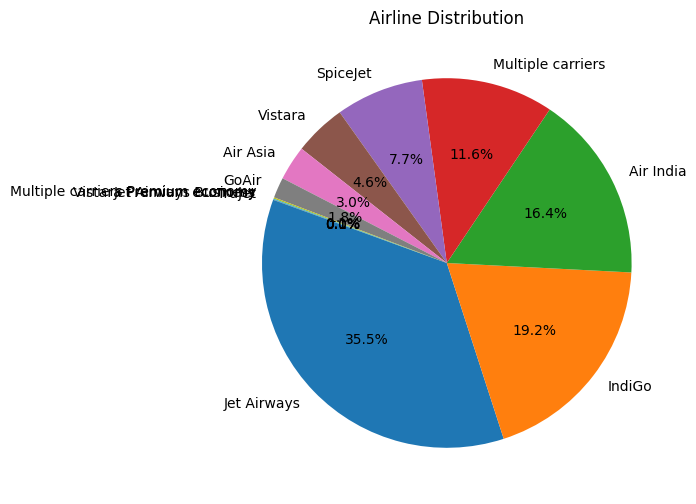

In [986]:
# pieplot
plt.figure(figsize=(6, 6))
plt.title('Airline Distribution')
airline_counts = merged_df['Airline'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=160)

plt.show()

Observations:
1. In this dataset Jet Airways has 35% of distribution or coverage for all attributes.
2. We have also some Airline name with similer distribution we can handle them as one.

In [987]:
#Analysing date of journey by extracting year months and day seprately
merged_df['year'] = pd.DatetimeIndex(merged_df['Date_of_Journey']).year
merged_df['month'] = pd.DatetimeIndex(merged_df['Date_of_Journey']).month
merged_df['day'] = pd.DatetimeIndex(merged_df['Date_of_Journey']).day

<ipython-input-987-e69366dabef3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['year'] = pd.DatetimeIndex(merged_df['Date_of_Journey']).year
<ipython-input-987-e69366dabef3>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['month'] = pd.DatetimeIndex(merged_df['Date_of_Journey']).month
<ipython-input-987-e69366dabef3>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['day'] = pd.DatetimeIndex(merged_df['Date_of_Journey']).day


***Checking total uniques for those columns***

In [988]:
list=merged_df[['year','month','day']]
for i in list:
  print(i,list[i].nunique())
  print(i,list[i].unique())

year 1
year [2019]
month 7
month [ 3  1  9 12  6  5  4]
day 9
day [24  5  6  3 27 18 15 21  4]


In [989]:
merged_df.drop(columns=["Date_of_Journey"],axis=1,inplace=True) # Dropping Date_of_jourmey ,as now this column has nothing to produce insights

Observation
1. Now we have three more columns as year,month, day
2. In all three columns we have data for only 7 months, and for year 2019.

###***Exploring column Total_stops***

In [990]:
print(merged_df.Total_Stops.nunique())
print(merged_df.Total_Stops.value_counts())

5
1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64


([<matplotlib.patches.Wedge at 0x7ebd7f2e5630>,
 [Text(-0.09820564741635654, 1.095607434629546, '1stop'),
  Text(-0.8917100486127613, -0.644090978979699, '2stops'),
  Text(-0.517815835523416, -0.9818180893022834, '3stops '),
  Text(-0.5407224466182023, -1.0600562417736266, '4stops '),
  Text(0.5747595893903592, -0.9378973368145502, 'non-stop')],
 [Text(-0.05356671677255811, 0.5976040552524795, '52.85'),
  Text(-0.48638729924332424, -0.3513223521707449, '14.22'),
  Text(-0.2845654591615169, -0.5395576887156692, '0.42'),
  Text(-0.31352814131643664, -0.6146544595158002, '0.01'),
  Text(0.3135052305765595, -0.5115803655352091, '32.50')])

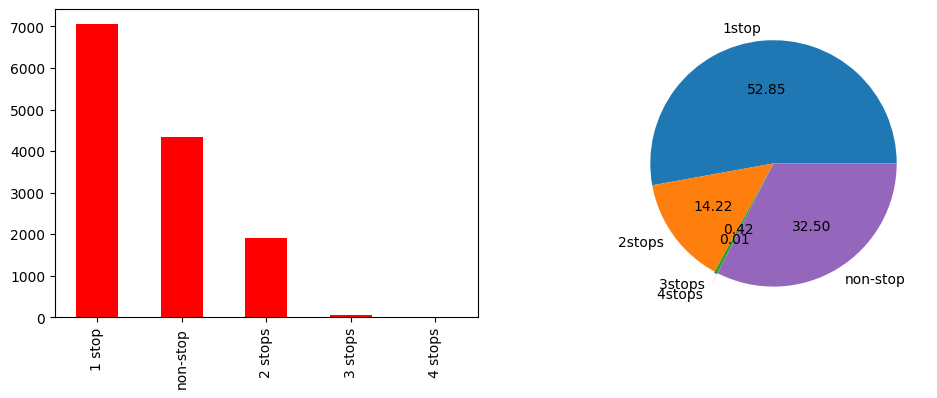

In [991]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
merged_df.Total_Stops.value_counts().plot(kind="bar",color="red")
plt.subplot(1,2,2)
keys=["1stop","2stops","3stops ","4stops ","non-stop"]
values=[7057,1899,56,2,4340]
explode=[0,0,0.01,0.09,0]
plt.pie(values,labels=keys,explode=explode,autopct='%.2f')

Observations
1. Most of the fights are with 1 stop or either non-stop

***Checking column route***

In [992]:
print("Total unique values :",merged_df.Route.nunique())
print(merged_df.Route.value_counts())

Total unique values : 132
DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JLR → HYD                   1
BOM → NDC → HYD                   1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → IXC → DEL → HYD             1
Name: Route, Length: 132, dtype: int64


- so we can conclude that this column has high cardinality and dose not has any order also.
- The values are just routes by fights passes and stops
- Values are also dose not provides any meaningfull insights ,we can drop this column from further analysis.

In [993]:
merged_df.drop(columns=["Route"],axis=1,inplace=True)
#Column removed from further analysis

###Exploring column Additional Info

total no of uniques 10
No info                         78.575708
In-flight meal not included     18.166841
No check-in baggage included     2.965404
1 Long layover                   0.149768
Change airports                  0.059907
Business class                   0.037442
No Info                          0.022465
1 Short layover                  0.007488
Red-eye flight                   0.007488
2 Long layover                   0.007488
Name: Additional_Info, dtype: float64


<Axes: >

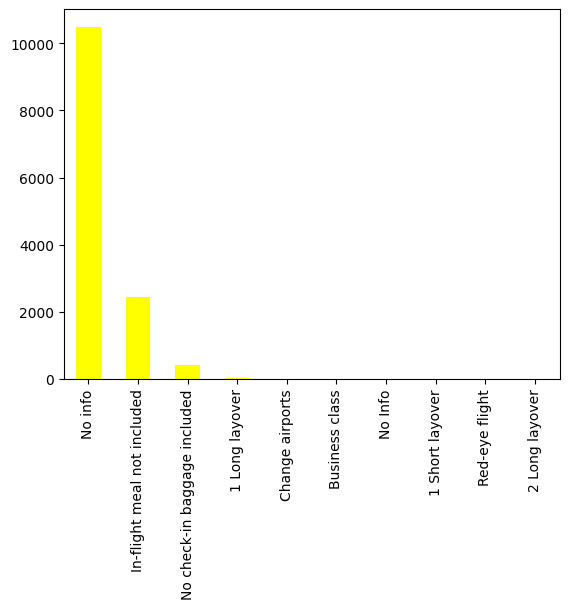

In [994]:
print("total no of uniques",merged_df.Additional_Info.nunique())
print(merged_df.Additional_Info.value_counts(normalize=True)*100)
merged_df.Additional_Info.value_counts().plot(kind="bar",color="yellow")

- As we can see the column has around 80% with representation of no infos,means also this column is not providing ay insights, we can drop this column easily.


In [995]:
merged_df.drop(columns=["Additional_Info"],axis=1,inplace=True)
#column is dropped from further analysis

### Exploring column Arrival_Time & Dep_Time

In [996]:
print("total no of uniques",merged_df.Arrival_Time.nunique())
print(merged_df.Arrival_Time.value_counts())
print("total no of uniques",merged_df.Dep_Time.nunique())
print(merged_df.Dep_Time.value_counts())

total no of uniques 1451
19:00           536
21:00           466
19:15           434
16:10           185
12:35           159
               ... 
13:15 22 May      1
08:50 07 Mar      1
06:50 28 Apr      1
00:25 22 Jun      1
07:45 13 May      1
Name: Arrival_Time, Length: 1451, dtype: int64
total no of uniques 223
18:55    288
17:00    275
10:00    265
07:05    240
07:10    239
        ... 
22:25      1
12:05      1
21:40      1
03:00      1
22:30      1
Name: Dep_Time, Length: 223, dtype: int64


- As we can not generate any insghts from arrival time and dep_time column we can drop it easily.
- As we have the total hours column we can drop easily.

In [997]:
merged_df.drop(columns=["Arrival_Time","Dep_Time"],axis=1,inplace=True)
#column is dropped

###Exploring column Duration

In [998]:
print("total no of uniques",merged_df.Duration.nunique())
print(merged_df.Duration.value_counts())

total no of uniques 374
2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
29h 10m      1
32h 55m      1
31h 30m      1
35h 20m      1
32h 25m      1
Name: Duration, Length: 374, dtype: int64


- So basically This column is explaining time taken by flight to reach destination from source place.
- It also an imporatant column, we need to handle wisely

In [999]:
#Seprating the total hours and total min
merged_df["Duration"]=merged_df["Duration"].str.split(" ")


Creating new column for hours

In [1000]:
merged_df["Total_Hour"]=merged_df["Duration"].str[0]

Replacing "h" which denotes hours with space

In [1001]:
merged_df['Total_Hour'] = merged_df['Total_Hour'] .replace({"h":'',"m":" "},regex=True)

In [1002]:
merged_df['Total_Hour'] = merged_df['Total_Hour'].astype('int')

- Now we have a column hours,

Creating new column for minuts as well

In [1003]:
merged_df["Total_minuts"]=merged_df["Duration"].str[1]
merged_df['Total_minuts'] = merged_df['Total_minuts'] .replace({"m":''},regex=True)


In [1004]:
merged_df['Total_minuts'] = merged_df['Total_minuts'].astype('float')

- So we have a new column total minuts.
- Now we can drop duration column from further analysis

In [1005]:
merged_df.drop(columns=["Duration"],axis=1,inplace=True)
#Column rempoved from further analysis

###Now we can also analyse Total_Hours and Total minuts column

10.235435075632768


<ipython-input-1006-64ba8557f7aa>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: title={'center': 'Histogram plot for totall_hour'}, xlabel='Total_Hour', ylabel='Count'>

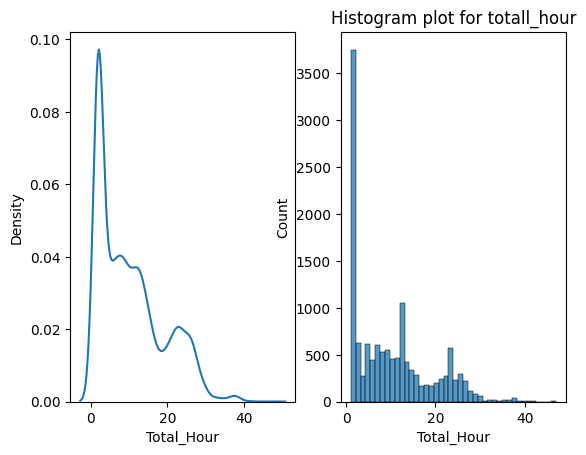

In [1006]:
#Exploring Total _hour column
print(merged_df["Total_Hour"].mean())
plt.title("Desity plot for totall_hour")
plt.subplot(1,2,1)
sns.kdeplot(x=merged_df["Total_Hour"])
plt.subplot(1,2,2)
plt.title("Histogram plot for totall_hour")
sns.histplot(x=merged_df["Total_Hour"])


- We can see that There are extreme values in the total_hour column.
- Most of the flights took 2 to 20 hours to reach destination.

#MULTI-VARIAT ANALYSIS

People travel most in which month or High profit, Explorong column Month and Price

month
1     10492.642791
3      8433.839891
4      5230.860849
5      9361.077628
6      9214.964905
9      9551.474395
12     9110.774295
Name: Price, dtype: float64


<Axes: xlabel='month'>

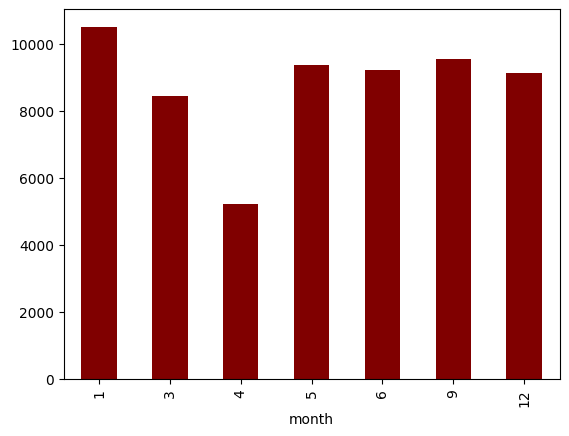

In [1007]:
print(merged_df.groupby(["month"])["Price"].mean())
merged_df.groupby(["month"])["Price"].mean().plot(kind="bar",color='maroon')

- So we can see that average price of flights are highest in month of January.
- On othe rhand for onth of April it is very low

***Analysis Airline type and Price column for each month***

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


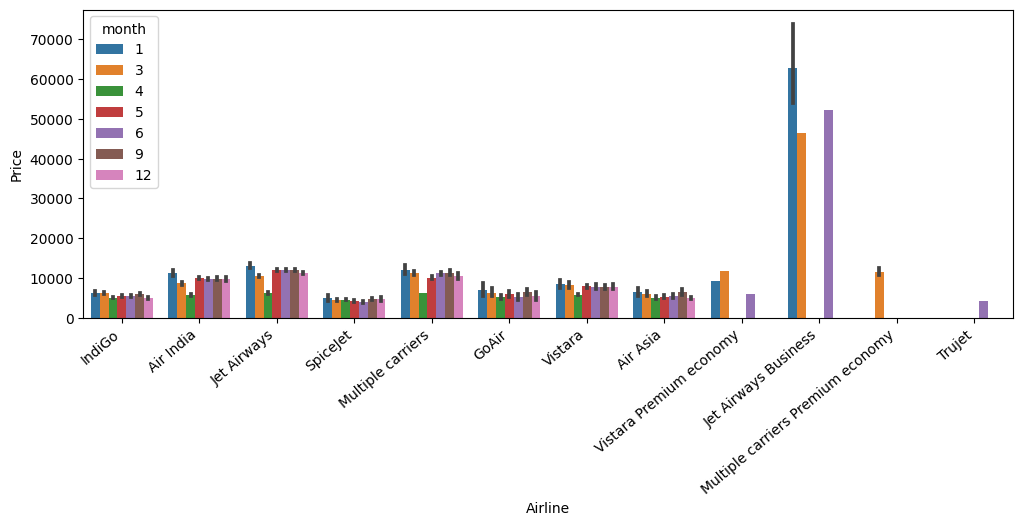

In [1008]:
print(merged_df.groupby(["Airline"])["Price"].agg(np.mean))
plt.figure(figsize=(12,4))
ax=sns.barplot(x=merged_df["Airline"],y=merged_df["Price"],hue=merged_df["month"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

- So we can obserb from above image average price for Jet Airways business class is very high than the others.

###Which source city has most number of fights

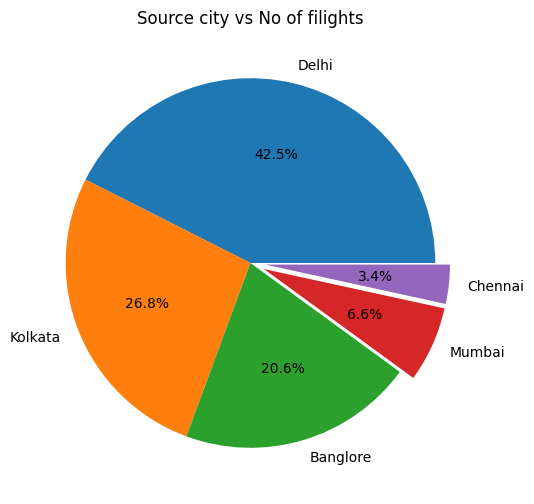

In [1009]:
# Create a pieplot of The Source city with the most number of flights
plt.figure(figsize=(6, 6))
plt.title('Source city vs No of filights')
airline_counts = merged_df['Source'].value_counts()
explode=[0,0,0,0.08,0.08]
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%',explode=explode)

plt.show()

- We can see From Delhi most number of flights were operated.

Top Destination cities

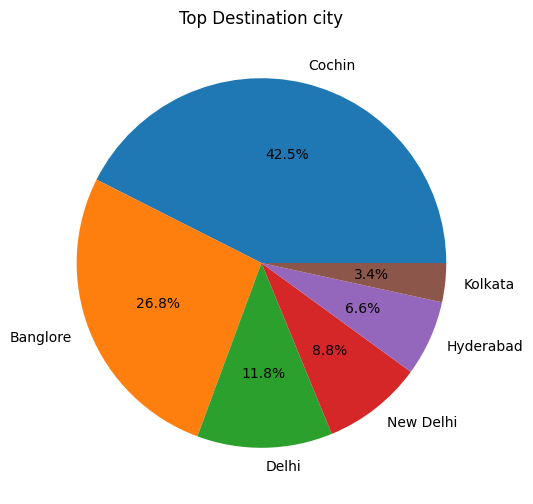

In [1010]:
# Create a pieplot of The Source city with the most number of flights
plt.figure(figsize=(6, 6))
plt.title('Top Destination city')
airline_counts = merged_df['Destination'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%')
plt.show()

- So we can see cochin at top postion and has almost 45% of share.

***#Outliers Handling***

Column has some outliers
Minimum_whisker: -5367.0
Maximum_Whisker : 23017.0
So minimum value for outliers is zero & for maximum lets consider 25,000
82 82


<Axes: xlabel='Price'>

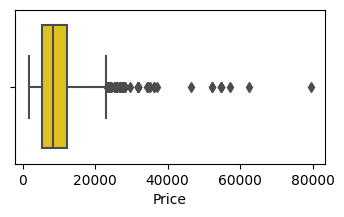

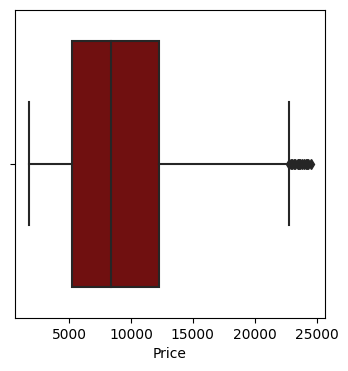

In [1011]:
#Price column
plt.figure(figsize=(4,2))
sns.boxplot(x=merged_df["Price"],color="gold")
#iqr method
print("Column has some outliers")
first_quantile=merged_df["Price"].quantile(0.25)
third_quantile=merged_df["Price"].quantile(0.75)
inter_quartile_range=third_quantile-first_quantile
lowest_threshold=first_quantile-1.5*inter_quartile_range
max_threshold=third_quantile+1.5*inter_quartile_range
print("Minimum_whisker:",lowest_threshold)
print("Maximum_Whisker :",max_threshold)
print("So minimum value for outliers is zero & for maximum lets consider 25,000")
lowest_threshold=0
df_price_outlier = merged_df[(merged_df['Price'] < lowest_threshold ) | (merged_df['Price'] > 25000)]
df_price_index=df_price_outlier.index
print(len(df_price_index),len(df_price_outlier))
df_price_index_values=df_price_index.values
merged_df.loc[df_price_index_values,"Price"]=merged_df["Price"].median()
plt.figure(figsize=(4,4))
sns.boxplot(x=merged_df["Price"],color="maroon")

###***Sanity check***

In [1012]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       13354 non-null  object 
 1   Source        13354 non-null  object 
 2   Destination   13354 non-null  object 
 3   Total_Stops   13354 non-null  object 
 4   Price         10683 non-null  float64
 5   year          13354 non-null  int64  
 6   month         13354 non-null  int64  
 7   day           13354 non-null  int64  
 8   Total_Hour    13354 non-null  int64  
 9   Total_minuts  12068 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.0+ MB


so we have null values in created column total minuts and we can impute with zero

In [1013]:
merged_df["Total_minuts"]=merged_df["Total_minuts"].fillna(0)

In [1014]:
merged_df.isnull().sum() #Checking for nulls

Airline            0
Source             0
Destination        0
Total_Stops        0
Price           2671
year               0
month              0
day                0
Total_Hour         0
Total_minuts       0
dtype: int64

**Checking for duplicates**

In [1015]:
print(len(merged_df))
merged_df.drop_duplicates(keep="first",inplace=True)
print(len(merged_df))

13354
12040


- So we had some duplicates present in data now its totaly cleared

#***Correlation factor***

<ipython-input-1016-fdae550df050>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()
<ipython-input-1016-fdae550df050>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(),cmap='RdYlGn')


<Axes: >

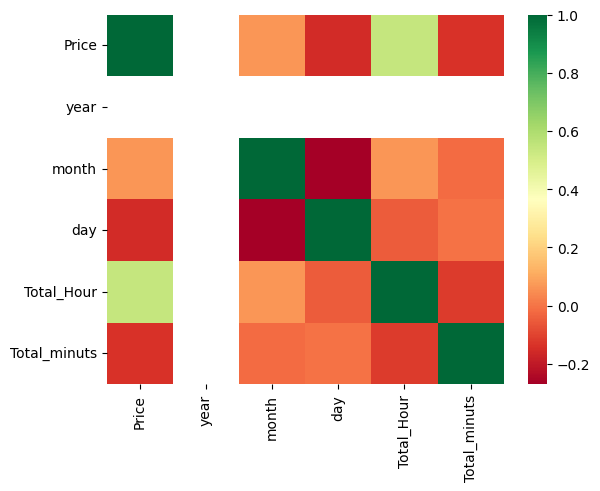

In [1016]:
merged_df.corr()
sns.heatmap(merged_df.corr(),cmap='RdYlGn')

we can drop year column as it has all values 2019 only

In [1017]:
merged_df.drop(columns=["year"],axis=1,inplace=True)

***#Data Preprocessing***

In [1018]:
print(merged_df.apply(lambda x : x.unique()))
print(merged_df.apply(lambda x : x.nunique())) #Checking unique values for each column

Airline         [IndiGo, Air India, Jet Airways, SpiceJet, Mul...
Source                [Banglore, Kolkata, Delhi, Chennai, Mumbai]
Destination     [New Delhi, Banglore, Cochin, Kolkata, Delhi, ...
Total_Stops         [non-stop, 2 stops, 1 stop, 3 stops, 4 stops]
Price           [3897.0, 7662.0, 13882.0, 6218.0, 13302.0, 387...
month                                      [3, 1, 9, 12, 6, 5, 4]
day                              [24, 5, 6, 3, 27, 18, 15, 21, 4]
Total_Hour      [2, 7, 19, 5, 4, 15, 21, 25, 13, 12, 26, 22, 2...
Total_minuts    [50.0, 25.0, 0.0, 45.0, 30.0, 5.0, 15.0, 35.0,...
dtype: object
Airline           12
Source             5
Destination        6
Total_Stops        5
Price           1838
month              7
day                9
Total_Hour        43
Total_minuts      12
dtype: int64


***Column Airline***

In [1019]:
merged_df.Airline.value_counts(normalize=True)*100

Jet Airways                          35.124585
IndiGo                               17.483389
Air India                            17.159468
Multiple carriers                    12.533223
SpiceJet                              7.641196
Vistara                               4.642857
Air Asia                              3.222591
GoAir                                 1.943522
Multiple carriers Premium economy     0.132890
Jet Airways Business                  0.066445
Vistara Premium economy               0.041528
Trujet                                0.008306
Name: Airline, dtype: float64

- So we have column Airline in which some type of airlines has similer shared values we can easily handle them as the values are beloow 7 % small representation, it will help us to reduce the values

###Checking categorical column Source & Destination

In [1020]:
print(merged_df["Source"].value_counts())
print("__________so we can see there are no orders in this source column and has less cardinality")
print(merged_df["Destination"].value_counts())
print("__________so we can see also there are no orders in Destination column and has less cardinality")

Delhi       5364
Kolkata     3318
Banglore    2258
Mumbai       715
Chennai      385
Name: Source, dtype: int64
__________so we can see there are no orders in this source column and has less cardinality
Cochin       5364
Banglore     3318
Delhi        1216
New Delhi    1042
Hyderabad     715
Kolkata       385
Name: Destination, dtype: int64
__________so we can see also there are no orders in Destination column and has less cardinality


**WE can create dummy variables for both columns**

In [1021]:
merged_df = pd.get_dummies(merged_df, columns=["Source","Destination"])

###**Treating column Total_Stops**

In [1022]:
print(merged_df["Total_Stops"].value_counts())
print("________We can see this column has a order and low cardinality___________")
print("________Replacing values with some order___________")
merged_df["Total_Stops"].replace({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

1 stop      6877
non-stop    3454
2 stops     1653
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64
________We can see this column has a order and low cardinality___________
________Replacing values with some order___________


###**Handling column Airline**

In [1023]:
print(merged_df["Airline"].value_counts(normalize=True)*100)
print("Convertig some values as one with same names")
merged_df["Airline"].replace({"Multiple carriers Premium economy":"Multiple carriers","Vistara Premium economy":"Vistara"},inplace=True)
print(merged_df["Airline"].value_counts(normalize=True)*100)
print("Handling all the fields which has les than 10% sharing as 1")
print(merged_df["Airline"].value_counts(normalize=True)*100)
print("Now converting in dummy varriable")
merged_df=pd.get_dummies(merged_df,columns=["Airline"])

Jet Airways                          35.124585
IndiGo                               17.483389
Air India                            17.159468
Multiple carriers                    12.533223
SpiceJet                              7.641196
Vistara                               4.642857
Air Asia                              3.222591
GoAir                                 1.943522
Multiple carriers Premium economy     0.132890
Jet Airways Business                  0.066445
Vistara Premium economy               0.041528
Trujet                                0.008306
Name: Airline, dtype: float64
Convertig some values as one with same names
Jet Airways             35.124585
IndiGo                  17.483389
Air India               17.159468
Multiple carriers       12.666113
SpiceJet                 7.641196
Vistara                  4.684385
Air Asia                 3.222591
GoAir                    1.943522
Jet Airways Business     0.066445
Trujet                   0.008306
Name: Airline, dtype:

###***Feature scaling***

In [1024]:
print(merged_df["Price"].skew())
print(merged_df["Total_Hour"].skew())
print(merged_df["Total_minuts"].skew())

0.41553244796112015
0.818375762339229
-0.06311148480576806


Scaling test Data

In [1025]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

In [1026]:
#Separating test and train set
df_train=merged_df.iloc[:9663,:]
df_test=merged_df.iloc[9663:,:]

In [1027]:
#Creating varriables
x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [1028]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=42)
#Breaking my data which has the target value in two train part and test part

In [1029]:
X_train[['Total_Hour',"Total_minuts"]]=scaler.fit_transform(X_train[['Total_Hour',"Total_minuts"]]) #as train data applied fit_transform
X_test[['Total_Hour',"Total_minuts"]]=scaler.transform(X_test[['Total_Hour',"Total_minuts"]])  #as test data applied transform

In [1030]:
df_test[['Total_Hour',"Total_minuts"]]=scaler.transform(df_test[['Total_Hour',"Total_minuts"]])

<ipython-input-1030-6b77184bc99f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Total_Hour',"Total_minuts"]]=scaler.transform(df_test[['Total_Hour',"Total_minuts"]])


###***Spliting the data***

now we have train and test data

In [1031]:
df_test=df_test.drop(columns=["Price"])

In [1032]:
print(X_train.columns)
print(Y_train.columns)

Index(['Total_Stops', 'month', 'day', 'Total_Hour', 'Total_minuts',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara'],
      dtype='object')
Index(['Price'], dtype='object')


#Model Generation

In [1033]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()

In [1034]:
model.fit(x,y) #Model training

LinearRegression()

#Cross validation

In [1035]:
from sklearn.metrics import r2_score,mean_squared_error

In [1036]:
model.fit(X_train,Y_train)

LinearRegression()

In [1037]:
cv=cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv=5) #5 numbers of cross validation

In [1038]:
cv

array([-6458790.47920919, -6698323.04925144, -6702388.61694957,
       -6842759.16175197, -6125268.83031174])

In [1039]:
np.mean(cv)

-6565506.027494781

In [1040]:
Y_pred=model.predict(X_test)
Y_pred

array([[14671.46708374],
       [14410.53881094],
       [ 2975.62144208],
       ...,
       [ 8690.64715025],
       [11694.50246066],
       [ 7692.87513651]])

#***Evaluation of model***

In [1041]:
# Metrics Calculation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

model.intercept_ , model.coef_



(array([6221.00408714]),
 array([[ 2557.64851292,   -30.78449499,   -63.10646116,    74.87145816,
           -40.43303511,   217.46395341,    81.65562028,   223.64786841,
           112.5826019 ,  -635.35004399,   112.5826019 ,   223.64786841,
          -925.54567684,  -635.35004399,    81.65562028,  1143.00963025,
          -768.37103016,   720.39863087,  -585.40192336,  -659.635138  ,
          3309.03551754, -1858.33665947,  2540.59945595, -1123.28458513,
         -2956.29599726,  1381.291729  ]]))

In [1042]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,Y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print("R2 Score for model is : ",r2_score(Y_test,Y_pred))

Mean absolute error (MAE): 1929.3824071771344
Mean square error (MSE): 6476895.773674272
Root mean square error (RMSE): 2544.9746115971907
R2 Score for model is :  0.6026131513279811


- So by Linear Regression we get around 60% score
- Trying other models as well


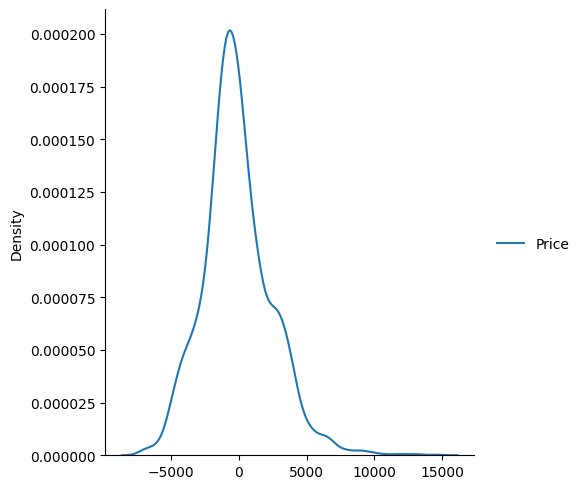

In [1043]:
sns.displot(Y_test-Y_pred,kind="kde")

#Polynomial_Regression

In [1044]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [1045]:
Reg=LinearRegression()

In [1046]:
poly=PolynomialFeatures(degree=2)

In [1047]:
X_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)

In [1048]:
poly.fit(X_poly,Y_train)

PolynomialFeatures()

In [1049]:
Reg.fit(X_poly,Y_train)

LinearRegression()

In [1050]:
Y_pred_p=Reg.predict(test_poly)

###Evaluation

In [1051]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,Y_pred_p))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,Y_pred_p))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_p)))
print("R2 Score for model is : ",r2_score(Y_test,Y_pred_p))

Mean absolute error (MAE): 1734.880055968691
Mean square error (MSE): 5304572.588191728
Root mean square error (RMSE): 2303.1657752302
R2 Score for model is :  0.6745404808054123


- Maximum score we are getting 67% by Polynomial regression

#Decision Tree

In [1052]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()

In [1053]:
def decisiontree(X_train, X_test, Y_train, Y_test):
    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X_train,Y_train)
    tree.predict(X_test)
    print(metrics.r2_score(Y_test,tree.predict(X_test)),metrics.r2_score(Y_test,tree.predict(X_test)))
    return tree

In [1054]:
tree = DecisionTreeRegressor(max_depth=10)

In [1055]:
tree.fit(X_train,Y_train)
tree_pred=tree.predict(X_test)
print("R2 Score for model is : ",r2_score(Y_test,tree_pred))

R2 Score for model is :  0.7364281211835406


#K-Nearest Neighbours

In [1056]:
def knearestneighbour(X_train, X_test, Y_train, Y_test):
    knn_regressor = KNeighborsRegressor(n_neighbors=10)
    knn_regressor.fit(X_train, Y_train)
    print(metrics.r2_score(Y_test,tree.predict(X_test)),metrics.r2_score(Y_test,tree.predict(X_test)))
    return knn_regressor

In [1057]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train, Y_train)
knn_pred=knn_regressor.predict(X_test)
print("R2 Score for model is : ",r2_score(Y_test,knn_pred))

R2 Score for model is :  0.6829997036439912


#Random forest

In [1058]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor with 100 trees
n_trees = 150
random_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)

# Train the Random Forest Regressor
random_forest.fit(X_train, Y_train)
r_predict=random_forest.predict(X_test)

print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,r_predict))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,r_predict))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,r_predict)))
print("R2 Score for model is : ",r2_score(Y_test,r_predict))

<ipython-input-1058-d08a15f146df>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)


Mean absolute error (MAE): 1374.7347144299285
Mean square error (MSE): 4176666.6808409547
Root mean square error (RMSE): 2043.6894775970627
R2 Score for model is :  0.7437426093841173


XG-Boost

In [1059]:
import xgboost as xgb

# Create an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the regressor
xgb_regressor.fit(X_train, Y_train)
xgb_pred=xgb_regressor.predict(X_test)
print("MAE Score for model is : ",mean_absolute_error(Y_test,xgb_pred))
print("MSE Score for model is : ",mean_squared_error(Y_test,xgb_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,xgb_pred)))
print("R2 Score for model is : ",r2_score(Y_test,xgb_pred))

MAE Score for model is :  1325.7789083048572
MSE Score for model is :  3329787.918220791
Root mean square error (RMSE): 1824.7706481146586
R2 Score for model is :  0.7957024516364454


#Parameter optimazation

In [1060]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [1061]:
param_grid = {
    "learning_rate" : [0.1,0.2,0.3,0.5,],
    "max_depth" : [4,5,6,7],
    "n_estimators" : [100,200,300,400,500]
}

In [1062]:
from xgboost import XGBRegressor
Xgboost_reg = XGBRegressor()

In [1063]:
reg = RandomizedSearchCV(XGBRegressor(),param_grid,random_state=0)

In [1064]:
model = reg.fit(X_train,Y_train)

In [1065]:
model.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1066]:
model

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.5],
                                        'max_depth': [4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0)

In [1067]:
from sklearn.model_selection import cross_val_score

In [1068]:
mse=cross_val_score(model.best_estimator_,X_train,Y_train,scoring="neg_mean_squared_error",cv=5)

In [1069]:
np.mean(mse)

-3746676.434915823

In [1070]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=42)
xgboost_regressor = model.best_estimator_
xgboost_regressor.fit(X_train, Y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1071]:
x_pred=xgboost_regressor.predict(X_test)

In [1072]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,x_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,x_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,x_pred)))
print("R2 Score for model is : ",r2_score(Y_test,x_pred))

Mean absolute error (MAE): 1302.0752632743781
Mean square error (MSE): 3248180.7651860043
Root mean square error (RMSE): 1802.2710021486791
R2 Score for model is :  0.800709419558548


__ So i am getting my best model with score 80%